<a href="https://colab.research.google.com/github/navpreet025/Thapar-summer-school-hack-1/blob/main/hack_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission (1).csv')

train.head()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
0,52.843,66.492,57.300,25.224,39.213,56.593,27.157,67.453,55.690,36.504,...,46.375,78.489,36.789,55.797,43.135,37.513,64.094,43.039,42.852,148.76994
1,50.478,53.147,46.412,38.045,52.160,50.398,60.157,44.022,48.668,45.512,...,61.904,46.994,35.492,55.057,43.859,54.722,51.982,43.310,46.613,152.01250
2,16.432,30.201,43.268,76.786,58.864,24.046,46.519,63.948,50.190,65.539,...,27.011,26.714,66.842,32.628,47.996,75.920,24.627,56.853,65.180,141.96694
3,39.355,33.501,76.737,57.453,58.991,49.938,42.713,71.836,47.394,64.772,...,44.349,45.166,85.341,32.967,26.003,40.192,41.518,74.502,37.807,152.49692
4,30.337,62.905,70.896,35.969,45.878,56.114,45.075,61.684,58.865,41.360,...,45.491,65.265,48.155,49.756,48.782,44.316,43.562,41.068,52.805,149.01620


In [ ]:
# Check for missing values
print(train.isnull().sum())

# Basic info
print(train.info())

# Drop rows/columns or fill NaNs if needed
# Example:
# train.fillna(0, inplace=True)


f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
target    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   float64
 1   f2      5000 non-null   float64
 2   f3      5000 non-null   float64
 3   f4      5000 non-null   float64
 4   f5      5000 non-null   float64
 5   f6      5000 non-null   float64
 6   f7      5000 non-null   float64
 7   f8      5000 non-null   float64
 8   f9      5000 non-null   float64
 9   f10     5000 non-null   float64
 10  f11     5000 non-null   float64
 11  f12     5000 non-null   float64
 12  f13     5000 non-null   float64
 13  f14     5000 non-null   float64
 14  f15     5000 non-null   float64

In [ ]:
X = train.drop(['target'], axis=1)  # Replace 'target' with the actual target column
y = train['target']


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validation
y_pred = model.predict(X_val)
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))


RMSE: 5.241731998232742


In [ ]:
test_features = test.drop(['id'], axis=1)
test_predictions = model.predict(test_features)


In [ ]:
sample_submission['target'] = test_predictions  # Replace 'target' if another name
sample_submission.to_csv('Navpreet_Kaur_12345678.csv', index=False)


<Axes: >

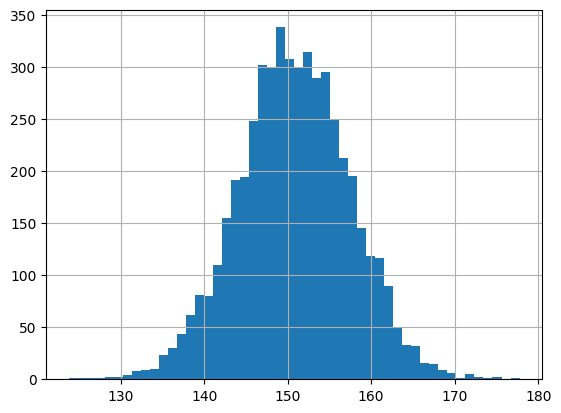

In [ ]:
train['target'].hist(bins=50)


In [ ]:
train['target'] = np.log1p(train['target'])  # log(1 + x)
# and remember to use np.expm1() after prediction


In [ ]:
train.head()
train.describe()
train.corr()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
f1,1.000000,-0.111401,-0.073894,-0.263853,0.097983,0.254593,0.243262,-0.032885,-0.238568,-0.166448,...,0.254097,0.240985,-0.286115,0.230304,0.158649,-0.096114,0.571186,0.116335,-0.106381,0.224269
f2,-0.111401,1.000000,0.326041,-0.345437,-0.254056,-0.013060,-0.168533,-0.174303,-0.217391,-0.109065,...,0.092151,0.039173,-0.255383,0.156133,-0.135983,-0.284823,0.153925,-0.077448,-0.423200,-0.212610
f3,-0.073894,0.326041,1.000000,0.046310,-0.290390,-0.064747,-0.529121,-0.106713,-0.253711,0.124839,...,-0.106064,0.210867,0.023365,-0.175778,-0.083332,-0.063973,-0.250619,-0.048498,-0.161974,-0.142923
f4,-0.263853,-0.345437,0.046310,1.000000,-0.026041,-0.437296,-0.097440,-0.172208,-0.129931,0.261456,...,-0.093885,-0.426005,0.427832,-0.387587,0.101829,0.478705,-0.339203,0.169201,0.081058,0.020712
f5,0.097983,-0.254056,-0.290390,-0.026041,1.000000,0.322783,0.235803,0.239800,0.148572,-0.236257,...,-0.286988,0.108319,0.301480,-0.072939,0.171617,0.161548,0.289841,0.120764,0.053993,0.148413
f6,0.254593,-0.013060,-0.064747,-0.437296,0.322783,1.000000,0.026726,0.028071,0.394112,-0.153177,...,0.052827,0.268992,-0.295041,0.381946,0.087949,-0.099773,0.395874,-0.242569,0.034623,0.079823
f7,0.243262,-0.168533,-0.529121,-0.097440,0.235803,0.026726,1.000000,0.176657,-0.003886,-0.411561,...,0.347133,-0.084497,-0.215053,0.457290,-0.022883,-0.167078,0.328031,0.175514,0.119074,0.165372
f8,-0.032885,-0.174303,-0.106713,-0.172208,0.239800,0.028071,0.176657,1.000000,-0.028296,0.028156,...,-0.068105,0.198908,0.382488,-0.134114,-0.239923,-0.438944,0.010334,0.298505,0.015178,0.106984
f9,-0.238568,-0.217391,-0.253711,-0.129931,0.148572,0.394112,-0.003886,-0.028296,1.000000,-0.064973,...,-0.020081,0.260507,0.019863,-0.062490,0.239372,-0.031053,-0.116050,-0.465630,0.227396,-0.079545
f10,-0.166448,-0.109065,0.124839,0.261456,-0.236257,-0.153177,-0.411561,0.028156,-0.064973,1.000000,...,-0.161154,-0.176621,0.416672,-0.434513,-0.119399,0.117510,-0.422258,0.005056,0.179345,0.052879


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 20
[LightGBM] [Info] Start training from score 150.725109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
              random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

search = RandomizedSearchCV(XGBRegressor(), param_grid, scoring='neg_root_mean_squared_error', cv=3)
search.fit(X_train, y_train)

best_model = search.best_estimator_


In [ ]:
# Example: XGBoost and LightGBM ensemble

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

model1 = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model2 = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

# Fit both models
model1.fit(X, y)
model2.fit(X, y)

# Predict using both
pred1 = model1.predict(test_features)
pred2 = model2.predict(test_features)

# Average the predictions
ensemble_pred = (pred1 + pred2) / 2


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 20
[LightGBM] [Info] Start training from score 150.814998


In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(XGBRegressor(n_estimators=100))
selector.fit(X, y)
X_new = selector.transform(X)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("CV RMSE:", -scores.mean())


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 20
[LightGBM] [Info] Start training from score 150.871247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
test_pred = best_model.predict(test_features)


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Load data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission (1).csv')

# Prepare features and target
target_column = train.columns[-1]
X = train.drop([target_column, 'id'], axis=1)
y = train[target_column]
test_features = test.drop(['id'], axis=1)

# Train XGBoost model
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X, y)

# Predict
test_predictions = model.predict(test_features)

# Generate submission
sample_submission[target_column] = test_predictions
sample_submission.to_csv('Navpreet_Kaur_12345678.csv', index=False)


KeyError: "['id'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Load data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission (1).csv')

# Define target
target_column = train.columns[-1]
y = train[target_column]

# Safely drop 'target' and 'id' from training data
drop_cols = [target_column]
if 'id' in train.columns:
    drop_cols.append('id')
X = train.drop(drop_cols, axis=1)

# Drop 'id' from test if it exists
if 'id' in test.columns:
    test_features = test.drop(['id'], axis=1)
else:
    test_features = test.copy()

# Train model
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X, y)

# Predict
test_predictions = model.predict(test_features)

# Prepare submission
sample_submission[target_column] = test_predictions
sample_submission.to_csv('Navpreet_Kaur_12345678.csv', index=False)


In [ ]:
print(train.info())
print(train.describe())
print(train.corr()[target_column].sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   float64
 1   f2      5000 non-null   float64
 2   f3      5000 non-null   float64
 3   f4      5000 non-null   float64
 4   f5      5000 non-null   float64
 5   f6      5000 non-null   float64
 6   f7      5000 non-null   float64
 7   f8      5000 non-null   float64
 8   f9      5000 non-null   float64
 9   f10     5000 non-null   float64
 10  f11     5000 non-null   float64
 11  f12     5000 non-null   float64
 12  f13     5000 non-null   float64
 13  f14     5000 non-null   float64
 14  f15     5000 non-null   float64
 15  f16     5000 non-null   float64
 16  f17     5000 non-null   float64
 17  f18     5000 non-null   float64
 18  f19     5000 non-null   float64
 19  f20     5000 non-null   float64
 20  target  5000 non-null   float64
dtypes: float64(21)
memory usage: 820.4 KB

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_features)


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

estimators = [
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.05)),
    ('lgbm', LGBMRegressor(n_estimators=200, learning_rate=0.05))
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

stack.fit(X, y)
preds = stack.predict(test_features)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 20
[LightGBM] [Info] Start training from score 150.814998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 20
[LightGBM] [Info] Start training from score 150.871247
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 20
[LightGBM] [Info] Start tr

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

search = RandomizedSearchCV(XGBRegressor(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
search.fit(X, y)
best_model = search.best_estimator_
preds = best_model.predict(test_features)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(XGBRegressor(), X, y, cv=5, scoring='neg_root_mean_squared_error')
print("CV RMSE:", -scores.mean())


CV RMSE: 5.577524424927067


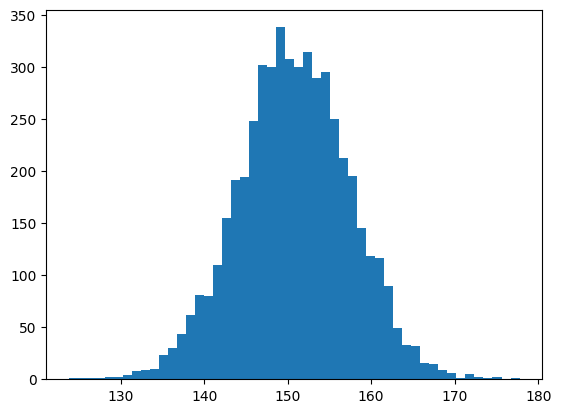

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y, bins=50)
plt.show()


In [ ]:
sample_submission[target_column] = preds
sample_submission.to_csv('Navpreet_Kaur_12345678.csv', index=False)


<Axes: >

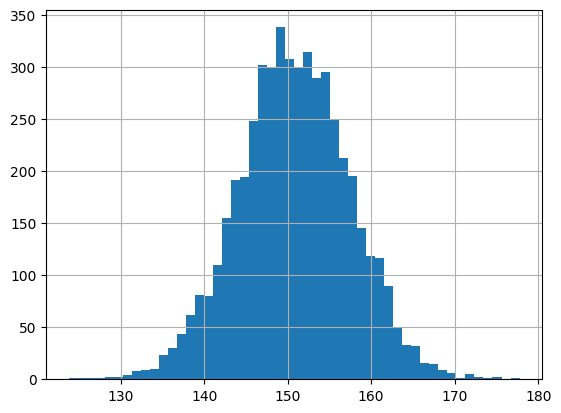

In [ ]:
import matplotlib.pyplot as plt
train['target'].hist(bins=50)


In [ ]:
y_log = np.log1p(y)
model.fit(X, y_log)

pred_log = model.predict(test_features)
pred = np.expm1(pred_log)  # back-transform for submission


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

search = RandomizedSearchCV(
    XGBRegressor(), param_grid, n_iter=10, cv=3, scoring='neg_root_mean_squared_error'
)
search.fit(X, y)
best_model = search.best_estimator_
pred = best_model.predict(test_features)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

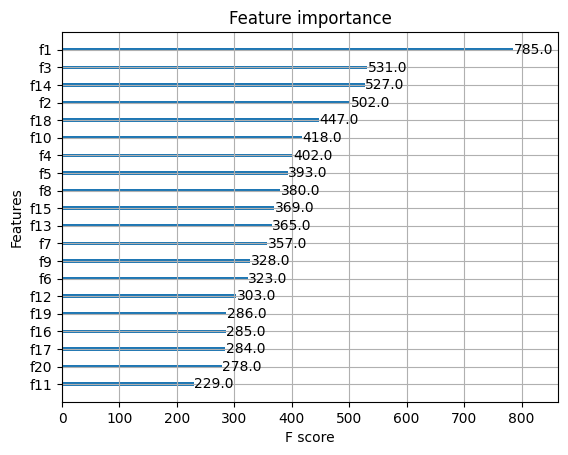

In [ ]:
from xgboost import plot_importance
plot_importance(model)


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define and train models
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X, y)

lgbm_model = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
lgbm_model.fit(X, y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 20
[LightGBM] [Info] Start training from score 150.814998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
              random_state=42)

In [ ]:
pred1 = xgb_model.predict(test_features)
pred2 = lgbm_model.predict(test_features)
pred = (pred1 + pred2) / 2


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Mean CV RMSE:", -scores.mean())


Mean CV RMSE: 5.355085092604056


In [ ]:
sample_submission[target_column] = pred
sample_submission.to_csv("Navpreet_Kaur_12345678.csv", index=False)


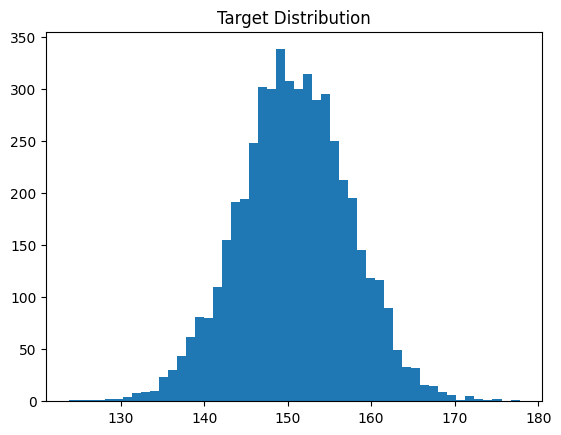

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(y, bins=50)
plt.title("Target Distribution")
plt.show()


In [ ]:
y_log = np.log1p(y)

# Train with log target
xgb_model.fit(X, y_log)
lgbm_model.fit(X, y_log)

# Predict and inverse transform
pred1 = np.expm1(xgb_model.predict(test_features))
pred2 = np.expm1(lgbm_model.predict(test_features))
final_pred = (pred1 + pred2) / 2


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 20
[LightGBM] [Info] Start training from score 5.021686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


<Axes: >

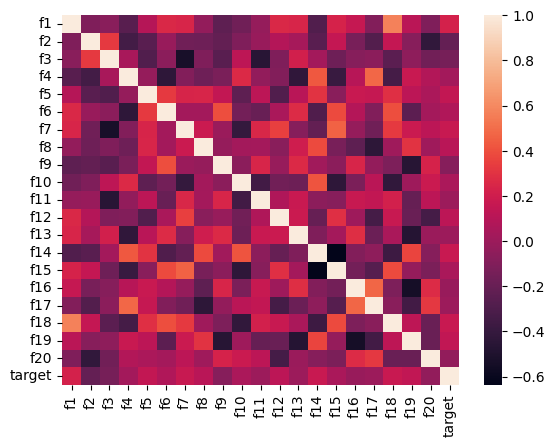

In [ ]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)
test_new = selector.transform(test_features)


In [ ]:
sample_submission[target_column] = final_pred
sample_submission.to_csv("Navpreet_Kaur_12345678.csv", index=False)


<Figure size 1200x800 with 0 Axes>

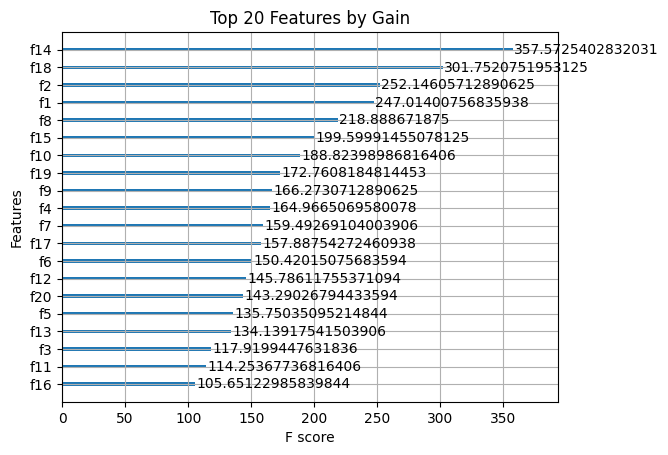

In [ ]:
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

# Train the model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X, y)

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Features by Gain")
plt.show()


In [ ]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(20))  # Top 20 features


   Feature  Importance
13     f14    0.098386
17     f18    0.083027
1       f2    0.069378
0       f1    0.067966
7       f8    0.060227
14     f15    0.054920
9      f10    0.051955
18     f19    0.047535
8       f9    0.045750
3       f4    0.045390
6       f7    0.043884
16     f17    0.043443
5       f6    0.041388
11     f12    0.040113
19     f20    0.039426
4       f5    0.037352
12     f13    0.036908
2       f3    0.032446
10     f11    0.031437
15     f16    0.029070


In [ ]:
low_importance = importance_df[importance_df['Importance'] < 0.001]['Feature'].tolist()
print("Dropping features:", low_importance)

X_reduced = X.drop(columns=low_importance)
test_reduced = test_features.drop(columns=low_importance)


Dropping features: []


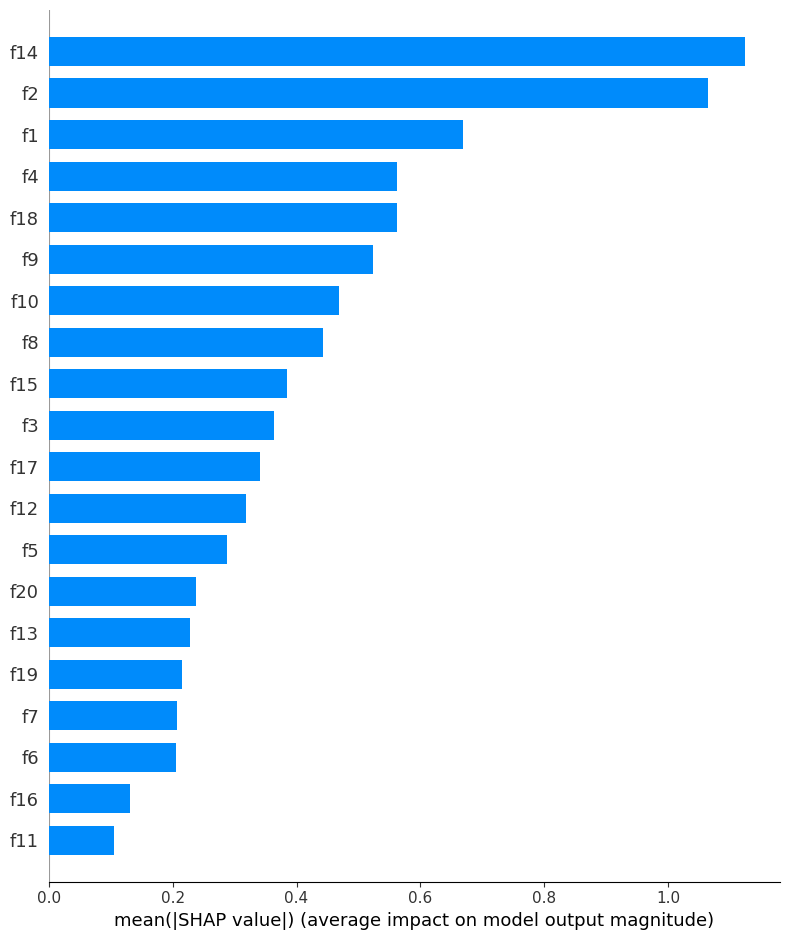

In [ ]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

shap.summary_plot(shap_values, X, plot_type="bar")


In [ ]:
# Step 1: Load sample submission (if not already loaded)
sample_submission = pd.read_csv('/content/sample_submission (1).csv')  # adjust if needed

# Step 2: Insert your predictions
# Make sure your predictions are in a NumPy array or list, named `final_pred` or `pred`
sample_submission['target'] = pred  # or use final_pred if you're log-transformed

# Step 3: Save CSV with your required naming format
filename = "Navpreet_Kaur_12345678.csv"
sample_submission.to_csv(filename, index=False)

# Step 4: Confirm it's saved
print(f"✅ Submission file saved as: {filename}")


✅ Submission file saved as: Navpreet_Kaur_12345678.csv
